In [24]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from scipy.integrate import quad

# Parte I

In [31]:
def fermi_dirac(E,U,T):
    k = 1.380649e-23
    return 1/(1+np.exp((E-U)/(k*T)))

def step(x):
    if 0 <= x: return 1
    return 0 

def get_N(E, U,T, L,Ec):
    h = 4.135667e-15
    m = 0.5*9.1e-31
    return fermi_dirac(E,U,T)*L/h*np.sqrt(2*m/(E-Ec))

def get_U(N,N_0, V_gs,C_g):
    q = 1.602176e-19
    # print(N, N_0)
    return q*q/C_g*(N-N_0)-q*V_gs

def solve_I(rec_U,T,Ec,N_0,V_gs, tol = 1e-5):
    Ec = 0
    L = 40e-9
    C_g = 0.1e-15 
    
    ns = []

    for U in tqdm(rec_U):
        args = (U,T,L,Ec)
        N = quad(get_N, Ec, np.inf, args=args)[0]

        ns.append(N)
        if abs(U-get_U(N,N_0,V_gs,C_g)) < tol:
            print('ªª Lo encontré al bastardo hdp')
    return ns
    
ns = solve_I(np.logspace(1e-5,1000, 10000), 
        1, 
        0, 
        0,
        0.3)


c:\Users\benja\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\function_base.py:277: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)
  0%|          | 0/10000 [00:00<?, ?it/s]C:\Users\benja\AppData\Local\Temp/ipykernel_7516/2432251702.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp((E-U)/(k*T)))
  0%|          | 34/10000 [00:00<00:30, 326.69it/s]C:\Users\benja\AppData\Local\Temp/ipykernel_7516/2432251702.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  N = quad(get_N, Ec, np.inf, args=args)[0]
 29%|██▊       | 2851/10000 [00:03<00:09, 790.80it/s] C:\Users\benja\AppData\Local\Temp/ipykernel_7516/2432251702.py:3: RuntimeWarning: overflow encountered in double_scalars
  return 1/(1+np.exp((E-U)/(k*T)))
100%|██████████| 10000/10000 [00:10<00:00, 929.85it/s]


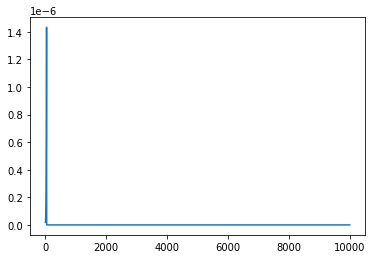

In [30]:
plt.plot(ns)
